# Insight of Raw Data
This document is to explore initial potential correlation among different attributes in mammal data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("./data/sleep_original.csv")

### Raw data
#### show raw data

In [3]:
df

,species,slowWaveSleep,dreamSleep,sleep,body,brain,life,gestation,predation,sleepExposure,danger
0,African_elephant,NaN,NaN,3.3,6654.000,5712.0,38.6,645.0,3,5,3
1,African_giant_pouched_rat,6.3,2.0,8.3,1.000,6.6,4.5,42.0,3,1,3
2,Arctic_Fox,NaN,NaN,12.5,3.385,44.5,14.0,60.0,1,1,1
3,Arctic_ground_squirrel,NaN,NaN,16.5,0.920,5.7,NaN,25.0,5,2,3
4,Asian_elephant,2.1,1.8,3.9,2547.000,4603.0,69.0,624.0,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...
57,Tree_hyrax,4.9,0.5,5.4,2.000,12.3,7.5,200.0,3,1,3
58,Tree_shrew,13.2,2.6,15.8,0.104,2.5,2.3,46.0,3,2,2
59,Vervet,9.7,0.6,10.3,4.190,58.0,24.0,210.0,4,3,4
60,Water_opossum,12.8,6.6,19.4,3.500,3.9,3.0,14.0,2,1,1


#### show raw data information

In [4]:
print(df.describe())

       slowWaveSleep  dreamSleep      sleep         body        brain  \
count      48.000000   50.000000  58.000000    62.000000    62.000000   
mean        8.672917    1.972000  10.532759   198.789984   283.134194   
std         3.666452    1.442651   4.606760   899.158011   930.278942   
min         2.100000    0.000000   2.600000     0.005000     0.140000   
25%         6.250000    0.900000   8.050000     0.600000     4.250000   
50%         8.350000    1.800000  10.450000     3.342500    17.250000   
75%        11.000000    2.550000  13.200000    48.202500   166.000000   
max        17.900000    6.600000  19.900000  6654.000000  5712.000000   

             life   gestation  predation  sleepExposure     danger  
count   58.000000   58.000000  62.000000      62.000000  62.000000  
mean    19.877586  142.353448   2.870968       2.419355   2.612903  
std     18.206255  146.805039   1.476414       1.604792   1.441252  
min      2.000000   12.000000   1.000000       1.000000   1.000000

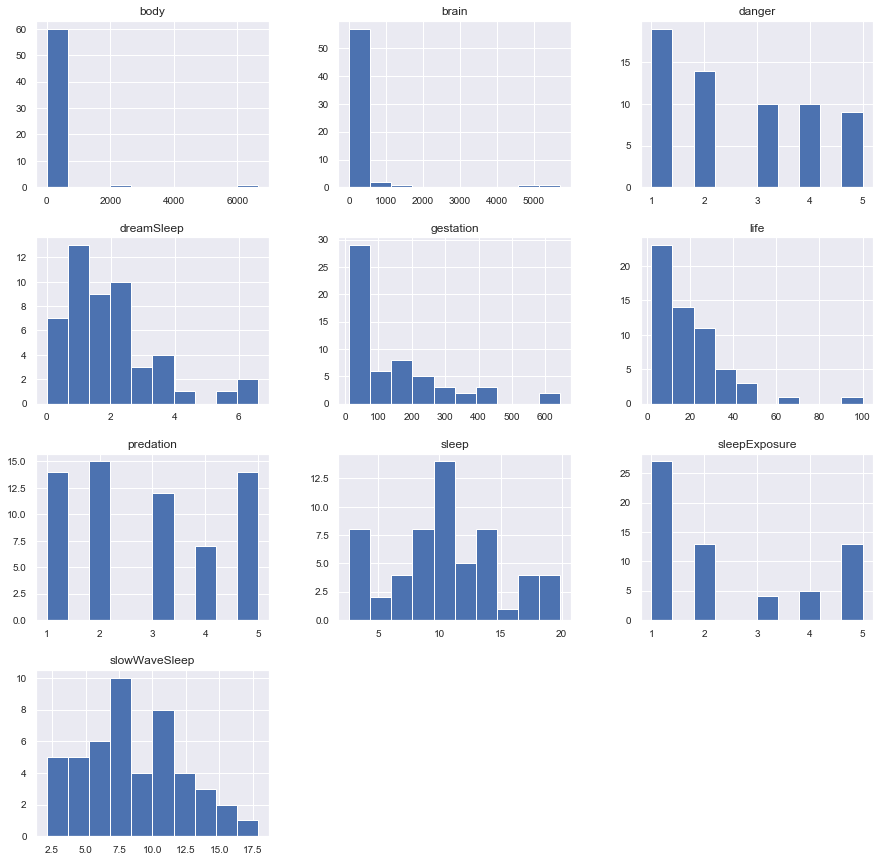

In [5]:
sns.set()
df.hist(sharex = False, sharey = False, xlabelsize = 10, ylabelsize = 10, figsize=(15, 15))
pyplot.show()

### Correlations between sleep/life and other attributes

#### Total Sleep vs Others

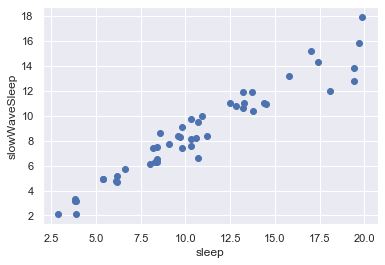

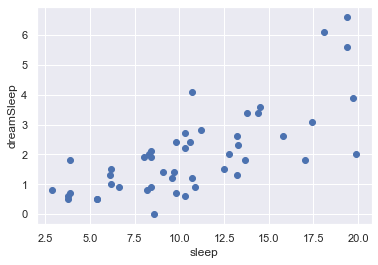

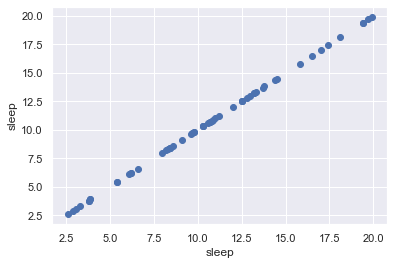

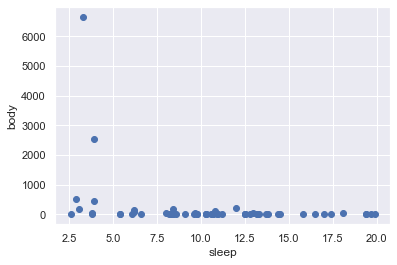

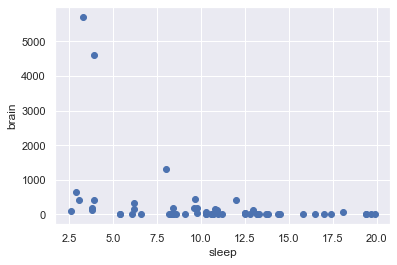

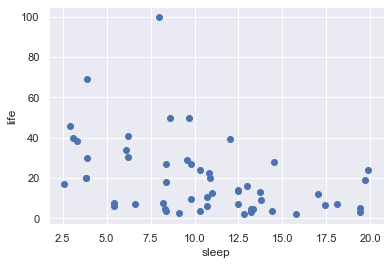

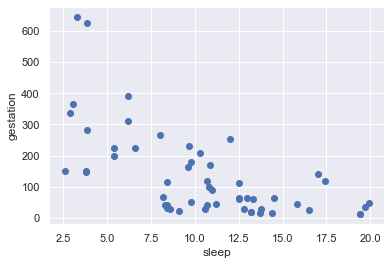

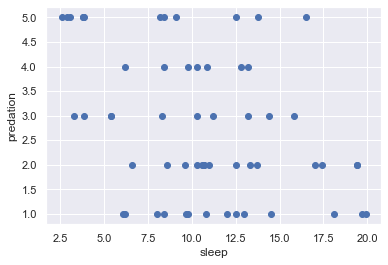

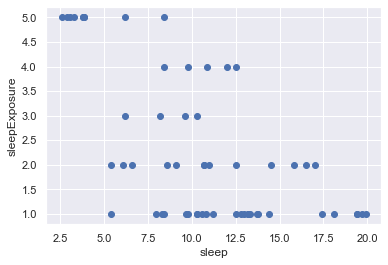

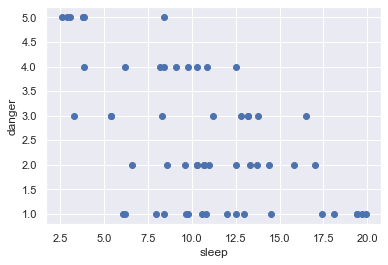

In [6]:
# Illustrate correlation between total sleep and other characters
for i in range(1, df.shape[1]):
    pyplot.scatter(df[df.columns[3]], df[df.columns[i]])
    pyplot.xlabel(df.columns[3])
    pyplot.ylabel(df.columns[i])
    pyplot.show()

#### Life Span vs Others

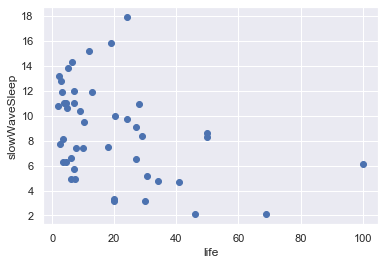

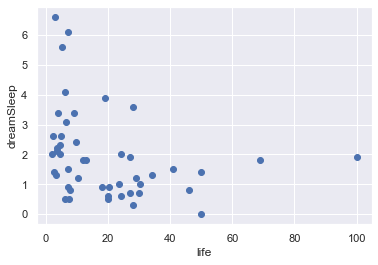

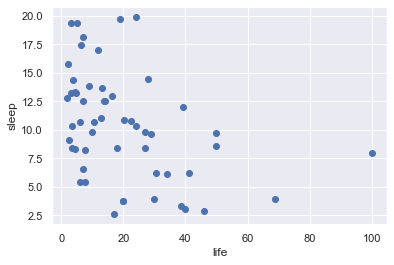

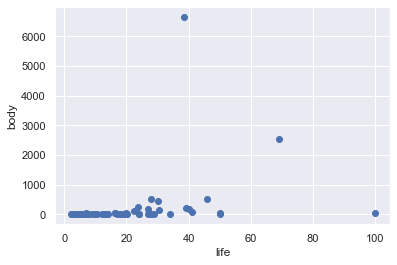

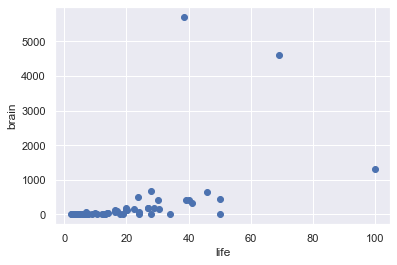

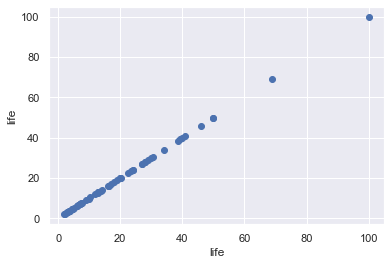

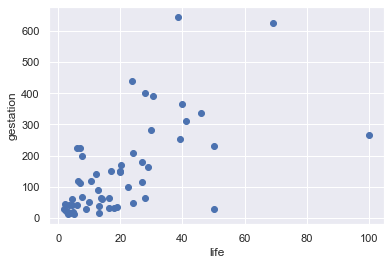

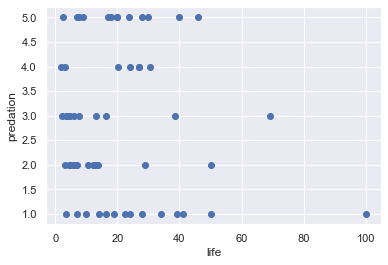

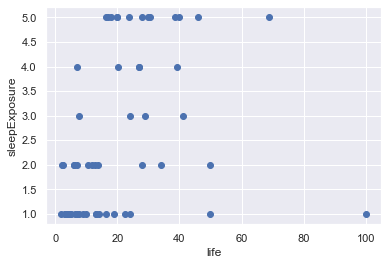

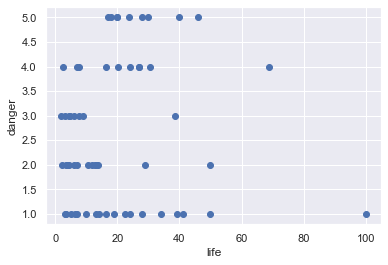

In [7]:
# Illustrate correlation between life-span and other characters
for i in range(1, df.shape[1]):
    pyplot.scatter(df[df.columns[6]], df[df.columns[i]])
    pyplot.xlabel(df.columns[6])
    pyplot.ylabel(df.columns[i])
    pyplot.show()

#### Pearson Correlation among All Features 

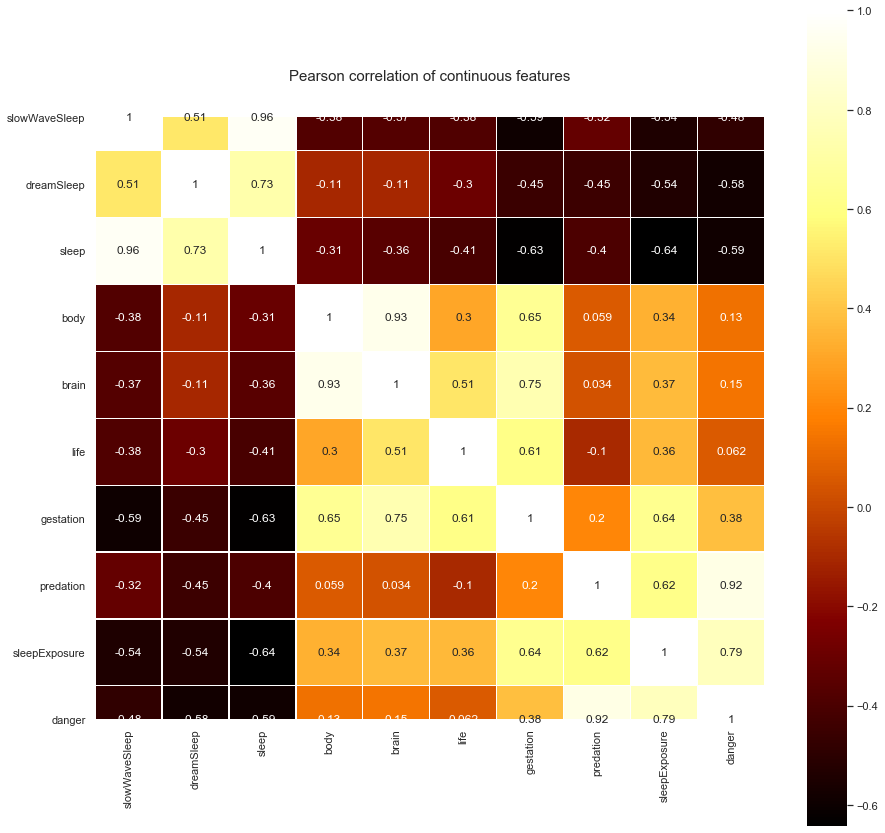

In [8]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(15,15))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

### Missing Data Visualization
Blank grids represent missing data

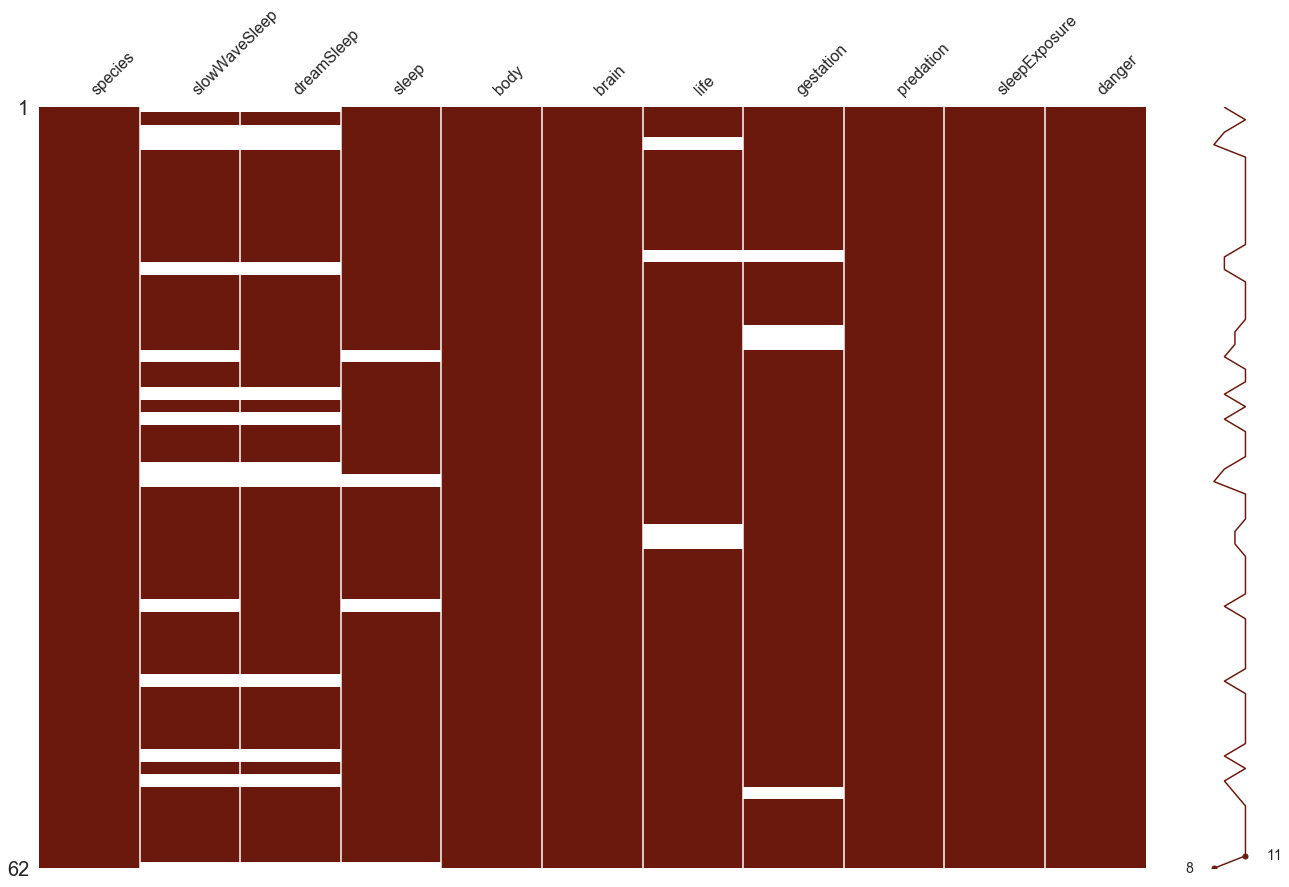

In [9]:
md_copy = df
md_copy = md_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=md_copy.iloc[:,:], figsize=(22, 14), color=(0.42, 0.1, 0.05))